# PSO for TSP

Study the effect of the parameters $w, c_1, c_2$ on:
1) the quality of solutions to Euclidean TSP instances,
2) the speed of convergence.

Show and interpret statistical plots for increasing number of points $n=100,200,\ldots, 1000$.

Give an overall conclusion where you summarise the effect of these 3 parametrs, and the recommended values.

In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

## Generation of points and distances matrix

In [2]:
n = 40
points = np.random.rand(n, 2)  # generate points as coordinate (x,y) in the box [0,1] x [0,1]
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO

In [3]:
def calc_total_distance(cycle):
    '''The objective function.
    Input: cycle
    Return: total distance
    '''
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

In [4]:
pso_tsp = PSO_TSP(func=calc_total_distance,
                  n_dim=n,
                  size_pop=200,
                  max_iter=800,
                  w=0.8,
                  c1=0.1,
                  c2=0.1)

best_points, best_distance = pso_tsp.run()

In [5]:
print('best_distance', best_distance)

best_distance [4.96612188]


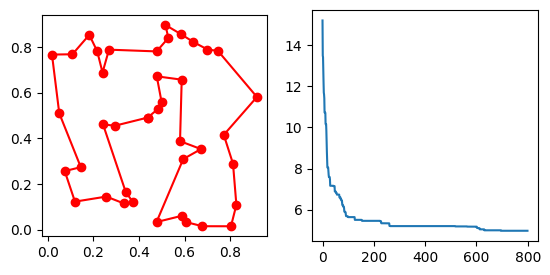

In [6]:
# %% plot
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(pso_tsp.gbest_y_hist)
ax[0].set_aspect('equal')
ax[1].set_aspect(80)
plt.show()